# IMPORT LIBARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# IMPORT CSV FILE

In [3]:
data=pd.read_csv('/content/insurance.csv')

# PREVIEW THE DATASET

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# CHECK THE NULL VALUES

In [5]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# DESCRIBE THE DATA AND ALSO HOW MANY ROW AND COLUMN

In [6]:
K=data.describe()
f=data.shape

In [7]:
print(f"THE NUMBER OF ROWS ARE {f[0]} AND THE NUMBER OF COLUMNS ARE {f[1]}")
print("THE DESCRIPTION OF THE DATA IS")
print(K)

THE NUMBER OF ROWS ARE 1338 AND THE NUMBER OF COLUMNS ARE 7
THE DESCRIPTION OF THE DATA IS
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# CHECK THE UNIQE VALUE FROM THE DATASET

In [9]:
for col in data.columns:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print("-" * 40)

Unique values in 'age':
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
----------------------------------------
Unique values in 'sex':
['female' 'male']
----------------------------------------
Unique values in 'bmi':
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   

# MAPPING THE DATASET

In [10]:
data["sex"] = data["sex"].map({"female": 0, "male": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
data["region"] = data["region"].map({"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3})

print(data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520


# TRAIN THE MODEL


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Features (X) and target (y)
X = data.drop("charges", axis=1)
y = data["charges"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to try
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Convert results into DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)


                           MAE         RMSE        R²
Linear Regression  4186.508898  5799.587091  0.783346
Lasso Regression   4186.582633  5799.622604  0.783344
Ridge Regression   4198.141005  5803.084710  0.783085
Random Forest      2523.085598  4600.475912  0.863674
Gradient Boosting  2447.951558  4352.538932  0.877973


Train R²: 0.9217545440375992
Test R²: 0.8743272487213666


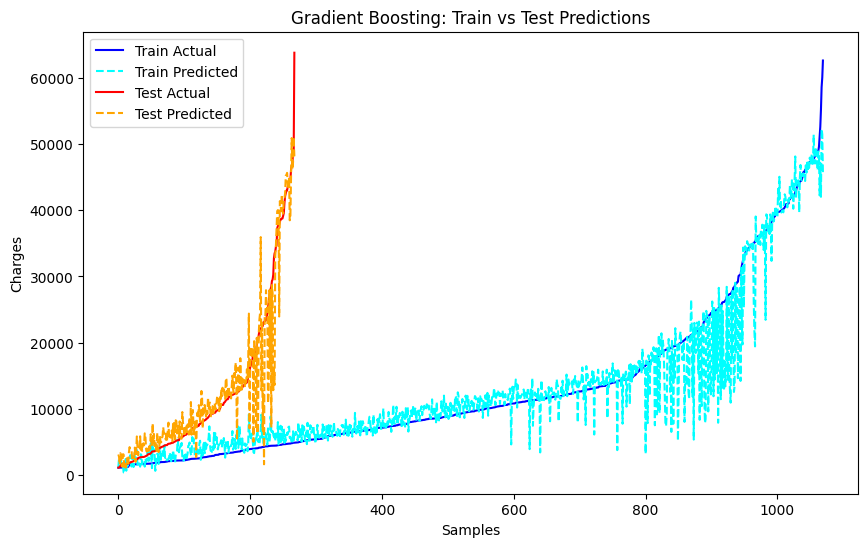

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # for saving model



# Features & Target
X = data.drop("charges", axis=1)
y = data["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = gb_model.predict(X_train_scaled)
y_test_pred = gb_model.predict(X_test_scaled)

# Evaluation
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# Save model
joblib.dump(gb_model, "gradient_boosting_insurance.pkl")
joblib.dump(scaler, "scaler.pkl")  # save scaler too

# ---- Visualization ----
plt.figure(figsize=(10,6))

# Sort values for smooth line plots
sorted_idx_train = np.argsort(y_train.values)
sorted_idx_test = np.argsort(y_test.values)

plt.plot(y_train.values[sorted_idx_train], label="Train Actual", color="blue")
plt.plot(y_train_pred[sorted_idx_train], label="Train Predicted", linestyle="--", color="cyan")

plt.plot(y_test.values[sorted_idx_test], label="Test Actual", color="red")
plt.plot(y_test_pred[sorted_idx_test], label="Test Predicted", linestyle="--", color="orange")

plt.xlabel("Samples")
plt.ylabel("Charges")
plt.title("Gradient Boosting: Train vs Test Predictions")
plt.legend()
plt.show()


# save the model


In [24]:
import joblib
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Save the model
joblib.dump(gb_model, "gradient_boosting_model.pkl")

print("✅ Model saved as gradient_boosting_model.pkl")


✅ Model saved as gradient_boosting_model.pkl
